## CSV 파일 
### IMPORT
### ```LOAD DATA INFILE ```
### 1. DB에 CSV 저장할 테이블 생성

In [5]:
heart <- read.csv("heart.csv")
heart %>% head

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>
1,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
2,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
4,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
5,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
6,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


```SQL
CREATE TABLE heart(
	Age INT(10) NULL,
    SEX CHAR(10) NULL,
    ChestPainType CHAR(10) NULL,
    RestingBP INT(10) NULL,
    Cholesterol INT(10) NULL,
    FastingBS INT(10) NULL,
    RestingECG CHAR(10) NULL,
    MaxHR INT(10) NULL,
    ExerciseAngina CHAR(10) NULL,
    Olepeak FLOAT(10) NULL,
    ST_Slope CHAR(10) NULL,
    HeartDisease INT(10) NULL
);
```

### 2. SQL 경로 확인
- LOAD할 경로 확인

```sql
SHOW VARIABLES LIKE 'secure_file%';
```

Variable_name,Value
<chr>,<chr>
secure_file_priv,C:\ProgramData\MySQL\MySQL Server 8.0\Uploads\


### 3. 데이터 Load

```sql
LOAD DATA 
INFILE 'C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/heart1.csv' # 파일경로
INTO TABLE heart
FIELDS TERMINATED BY ',' # (csv는 ,로 열 구분)
ENCLOSED BY '' 
LINES TERMINATED BY '/n' # (csv는 줄바꿈으로 행 구분)
IGNORE 1 ROWS; # (첫번째 행은 컬럼명이므로 무시)
```

##  

### EXPORT

In [10]:
dbGetQuery(conn, "SELECT * FROM heart")

,Age,SEX,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Olepeak,ST_Slope,HeartDisease
,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>
1,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
2,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
4,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
5,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
6,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


```sql
SELECT * INTO OUTFILE 'C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/heart2.csv'
FIELDS TERMINATED BY ','
ENCLOSED BY ""
ESCAPED BY '\\'
LINES TERMINATED BY '\n'
FROM heart;
```

In [9]:
read.csv("C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/heart1.csv", header = F) %>% head

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12
,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>
1,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
2,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
4,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
5,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
6,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


#  

## JOIN
### ```INNER JOIN ~ ON``` : 내부 JOIN
- 1 대 다 (one to many)
- 두 테이블에 모두 데이터가 있어야 결과 가능 
- 기본키 & 외래키

**city의 CountryCode와, country의 Code가 겹치는 값에 대해서 JOIN**

In [54]:
dbGetQuery(conn, "SELECT * FROM world.city
                  INNER JOIN world.country 
                  ON world.city.CountryCode = world.country.Code;")

   ID       Name CountryCode         District Population Code        Name
1 129 Oranjestad         ABW 횂\xe2\u0080\x93      29034  ABW       Aruba
2   1      Kabul         AFG            Kabol    1780000  AFG Afghanistan
3   2   Qandahar         AFG         Qandahar     237500  AFG Afghanistan
      Continent                    Region SurfaceArea IndepYear Population
1 North America                 Caribbean         193        NA     103000
2          Asia Southern and Central Asia      652090      1919   22720000
3          Asia Southern and Central Asia      652090      1919   22720000
  LifeExpectancy  GNP GNPOld             LocalName
1           78.4  828    793                 Aruba
2           45.9 5976     NA Afganistan/Afqanestan
3           45.9 5976     NA Afganistan/Afqanestan
                                GovernmentForm   HeadOfState Capital Code2
1 Nonmetropolitan Territory of The Netherlands       Beatrix     129    AW
2                              Islamic Emirate Moha

### 별칭(Alias) : 코드를 간결하게 하기 위해 사용

### ```OUTER JOIN ~ ON``` : 외부 JOIN
- 한쪽에만 데이터가 있어도 결과 가능
- OUTER JOIN문 기준으로 LEFT / RIGHT / FULL 

**world.city테이블을 C, world country 테이블을 CT로 지정**

**=> world.city C의 CountryCode와 동일한 Code를 가진 C.CountryCode 데이터를 world.city.C 기준으로 결합**

**=> 결합한 데이터의 C.ID, C.Name, C.CountryCode가 중복되지 않게, C.ID 오름차순으로 조회**

In [67]:
dbGetQuery(conn, "SELECT C.ID, C.Name, C.CountryCode 
                  FROM world.city C
                  LEFT OUTER JOIN world.country CT 
                  ON C.CountryCode = CT.Code
                  ORDER BY C.ID;") 

,ID,Name,CountryCode
,<int>,<chr>,<chr>
1,1,Kabul,AFG
2,2,Qandahar,AFG
3,3,Herat,AFG
4,4,Mazar-e-Sharif,AFG
5,5,Amsterdam,NLD
6,6,Rotterdam,NLD


### ```CROSS JOIN``` : 상호JOIN, 카르테시안 곱
- 한 쪽 테이블의 모든 행과 다른 쪽 테이블의 모든 행을 조인
- 만약 한 쪽 테이블의 길이가 n, 다른 쪽 테이블의 길이가 m이면 
- 상호 조인된 결과의 길이는 n X m
- ON구문 사용 X
- 결과의 내용은 의미없음 why? 랜덤 조인

In [25]:
dbGetQuery(conn, "SELECT COUNT(*) FROM sakila.inventory")
dbGetQuery(conn, "SELECT COUNT(*) FROM world.city;") 
dbGetQuery(conn, "SELECT COUNT(*) FROM sakila.inventory  
                  CROSS JOIN world.city;") 

  COUNT(*)
1     4581
  COUNT(*)
1     4079
  COUNT(*)
1 18685899


### 자체JOIN
- 자신이 자신과 조인
- 별도의 테이블 필요X

**emp_table테이블의 manager열과 emp열이 동일한 데이터들을 내부결합**

**=> - 결합한 데이터에서 emp가 ‘F’인 데이터의 A.emp, B.emp, B.phone를 조회**

In [68]:
dbGetQuery(conn, "SELECT * FROM market_db.emp_table")

emp,manager,phone
<chr>,<chr>,<chr>
A,NA,0000
B,A,1111
C,A,2222
D,A,3333
E,B,1111-1
F,C,2222-1
G,C,2222-2
H,D,3333-1
I,D,3333-1-1


In [70]:
dbGetQuery(conn, "SELECT A.emp, B.emp, B.phone 
                  FROM emp_table A
                  INNER JOIN emp_table B ON A.manager = B.emp
                  WHERE A.emp = 'F';") 

emp,emp,phone
<chr>,<chr>,<chr>
F,C,2222


#  

## 인덱스
### INDEX : 테이블에서 원하는 데이터를 빠르게 찾기 위해 사용
- 일반적으로 데이터를 검색할 때 순서대로 테이블 전체를 검색하므로 데이터가 많으면 많을수록 탐색 시간 증가
- 검색과 질의를 할 때 테이블 전체를 읽지 않기 대문에 빠름
- 설정된 컬럼 값을 포함한 데이터의 삽입, 삭제, 수정, 작업이 원본 테이블에서 이루어질 경우, 인덱스도 함꼐 수정
- 인덱스가 있는 테입르은 처리 속도가 느려질 수 있음
- 수정보다는 검색이 자주 사용되는 테이블에서 사용하는 것이 좋음

- **INSERT, UPDATE, DELETE가 자주 발생한다면 성능 저하 발생 가능**

### 클러스터형 인덱스
- 기본 키로 **테이블에 1개만 생성 가능**
- 어떤 열을 기본 키로 지정하면(클러스터형 인덱스가 생성), 그 열을 기준으로 자동 정렬 

### 균형트리구조 : 루트노드(root node) -> 리프노드 (leaf node)
- 노드 = 페이지(16kb)
- 데이터를 검색하는데 효율적 
- (INSERT, UPDATE, DELETE)성능 나빠짐 why? 페이지 분할 (새로운 페이지를 준비해서 데이터를 나누는 작업)
- INSERT로 데이터를 연속으로 추가하다 보면, 리프노드에서 페이지 분할로 인하여 새로운 리프노드 생성 -> 루트노드에 데이터 추가 -> 루트노드에 데이터가 꽉 참 (최대 7개) -> 루트노드에서 페이지 분할 -> 루트노드는 더 이상 루트노드가 아니게 됨.


### 인덱스 내부 동작
#### B-TREE (Balanced Tree : 균형 트리)

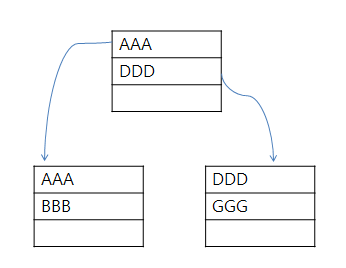

#### 삽입 동작 시 (EEE 삽입)
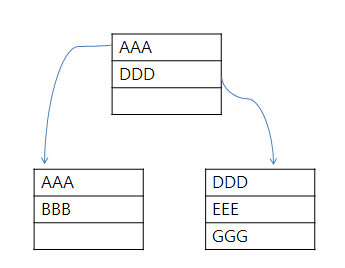

#### 삽입 동작 시 (FFF 삽입) -> 페이지 분할

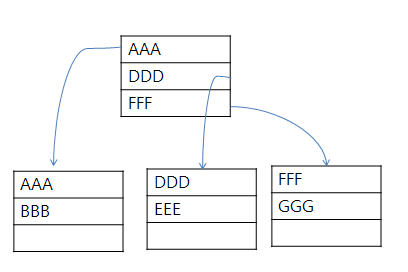

#### 균형트리는 무조건 루트 노드부터 검색 => 모든 리프 페이지를 Full Table Scan하는 것이 아니라 빠른 속도와 효율성 

### 인덱스 생성
- 인덱스는 열 단위로 생성
- 하나의 열에 인덱스 생성가능, 여러 열에 하나의 인덱스를 생성 가능
- 테이블 생성시 하나의 열에 기본키를 지정하면 자동으로 클러스터형 인덱스가 생성
- 기본키를 지정하는 열에 강제적으로 보조 인덱스 지정 가능
- 제약 조건 없이 테이블 생성시에 인덱스 생성 가능 
- 인덱스가 자동 생성되기 위한 열의 제약조건은 기본키 또는 고유기 뿐

### 클러스터형 인덱스 생성

In [17]:
# mem_id가 기본키 
dbGetQuery(conn, "SELECT * FROM cluster")

id,nick
<int>,<chr>
1,asdf1
2,asdf2
3,asdf3
11,asdf4
12,asdf5
21,asdf6
22,asdf7
31,asdf8
32,asdf9


In [29]:
dbGetQuery(conn, "ALTER TABLE cluster 
                  ADD CONSTRAINT 
                  PRIMARY KEY (id);")

<0 x 0 matrix>

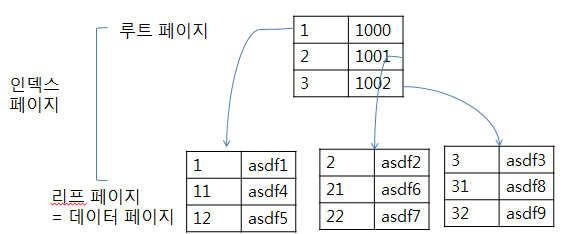

- 클러스터형 인덱스를 구성하기 위해서 행 데이터를 해당 열로 정렬한 후에, 루트 노드를 만들게 된다.
- 클러스터형 인덱스는 루트 노드와 리프 노드로 구성되며, 리프 노드는 데이터 그 자체
- 클러스터형 인덱스는 검색 속도고 보조형 인덱스 보다 더 빠름

### 보조 인덱스 생성
- 고유 키
- **테이블에 여러 개 생성 가능**, 만들 때 마다 공간 차지
- 정렬되지 않음
- 단순 보조 인덱스 : 데이터 중복
- 고유 보조 인덱스 : 데이터 중복X
- 업무상 절대로 중복되지 않는 열 (주민번호, 학번, 이메일 등)에만 UNIQUE 옵션 추가

In [21]:
dbGetQuery(conn, "SELECT * FROM noncluster")

id,nick
<int>,<chr>
1,asdf1
2,asdf2
3,asdf3
11,asdf4
12,asdf5
21,asdf6
22,asdf7
31,asdf8
32,asdf9


In [22]:
dbGetQuery(conn, "ALTER TABLE cluster 
                  ADD CONSTRAINT 
                  UNIQUE (id);")

<0 x 0 matrix>

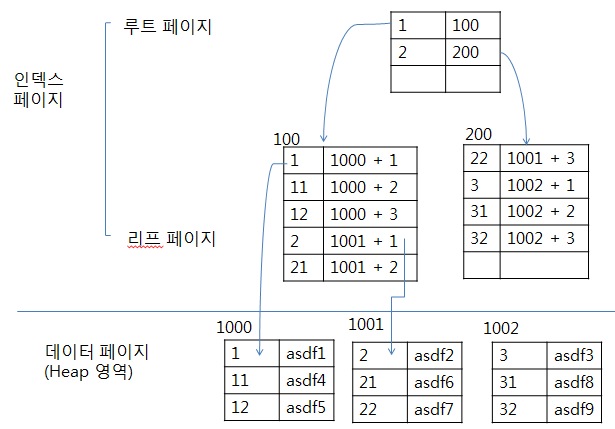

- 보조형 인덱스는 리프 노드를 건들지 않고, 별도의 장소에 인덱스 노드를 생성
- 인덱스 노드의 리프 노드에 인덱스로 구성된 열을 정렬한 후 위치 포인터를 생성

### ```CREATE INDEX {인덱스_이름} ON {테이블} ({열_이름})``` : 인덱스 생성
- ```CREATE UNIQUE INDEX ~ ```일 경우 중복이 안되는 고유 인덱스 생성 (생략시 중복 허용)
- 중복된 값이 있는 열에는 ```UNIQUE INDEX```생성 불가




In [42]:
dbGetQuery(conn, "SELECT * FROM market_db.member") 

mem_id,mem_name,mem_number,addr,phone1,phone2,height,debut_date
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>
APN,에이핑크,6,경기,031,77777777,164,2011-02-10
BLK,블랙핑크,4,경남,055,22222222,163,2016-08-08
GRL,소녀시대,8,서울,02,44444444,168,2007-08-02
ITZ,잇지,5,경남,NA,NA,167,2019-02-12
MMU,마마무,4,전남,061,99999999,165,2014-06-19
OMY,오마이걸,7,서울,NA,NA,160,2015-04-21
RED,레드벨벳,4,경북,054,55555555,161,2014-08-01
SPC,우주소녀,13,서울,02,88888888,162,2016-02-25
TWC,트와이스,9,서울,02,11111111,167,2015-10-19


In [45]:
dbGetQuery(conn, "CREATE UNIQUE INDEX IDX1
                  ON market_db.member (mem_id);")

<0 x 0 matrix>

### ```SHOW INDEX``` : 인덱스 정보 확인
- Key_name이 PRIMARY이면 클러스터형 인덱스를 의미
- Non_unique가 0 : 중복 허용 안함 (고유 보조 인덱스) -> 중복된 데이터 입력 불가 
- Non_unique가 1 : 중복 허용 (단순 보조 인덱스)
- Column_name : 클러스터형 인덱스가 설정된 열

In [54]:
dbGetQuery(conn, "SHOW INDEX FROM market_db.member;")

Warning message in .local(conn, statement, ...):
"Unsigned INTEGER in col 3 imported as numeric"
Warning message in .local(conn, statement, ...):
"unrecognized MySQL field type 6 in column 8 imported as character"


Table,Non_unique,Key_name,Seq_in_index,Column_name,Collation,Cardinality,Sub_part,Packed,Null,Index_type,Comment,Index_comment,Visible,Expression
<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
member,0,IDX1,1,mem_id,A,10,NA,NA,,BTREE,,,YES,NA


**단순 보조 인덱스 생성**
- **Non_unique가 1로 설정되어 있으므로 고유 보조 인덱스가 아님**

In [55]:
dbGetQuery(conn, "CREATE INDEX IDX2
                  ON market_db.member (mem_number);")

<0 x 0 matrix>

In [56]:
dbGetQuery(conn, "SHOW INDEX FROM market_db.member;")

Warning message in .local(conn, statement, ...):
"Unsigned INTEGER in col 3 imported as numeric"
Warning message in .local(conn, statement, ...):
"unrecognized MySQL field type 6 in column 8 imported as character"


Table,Non_unique,Key_name,Seq_in_index,Column_name,Collation,Cardinality,Sub_part,Packed,Null,Index_type,Comment,Index_comment,Visible,Expression
<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
member,0,IDX1,1,mem_id,A,10,NA,NA,,BTREE,,,YES,NA
member,1,IDX2,1,mem_number,A,7,NA,NA,,BTREE,,,YES,NA


### ```ANALYZE TABLE``` : 테이블 분석/처리, 생성한 인덱스 실제로 적용

- Data_length : 클러스터형 인덱스(또는 데이터)의 크기를 Byte단위로 표기 
- Index_length : 보조 인덱스의 크기
- 위에서 인덱스가 추가되었지만, Index_length (보조 인덱스 크기)는 아직 0

In [57]:
dbGetQuery(conn, "SHOW TABLE STATUS LIKE 'member'")

Warning message in .local(conn, statement, ...):
"unrecognized MySQL field type 7 in column 11 imported as character"


Name,Engine,Version,Row_format,Rows,Avg_row_length,Data_length,Max_data_length,Index_length,Data_free,Auto_increment,Create_time,Update_time,Check_time,Collation,Checksum,Create_options,Comment
<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
member,InnoDB,10,Dynamic,10,1638,16384,0,0,0,NA,2022-06-26 22:22:21,NA,NA,utf8mb4_0900_ai_ci,NA,,


**보조 인덱스 생성 적용 및 확인**

In [58]:
dbGetQuery(conn, "ANALYZE TABLE market_db.member;")
dbGetQuery(conn, "SHOW TABLE STATUS LIKE 'member'")

Table,Op,Msg_type,Msg_text
<chr>,<chr>,<chr>,<chr>
market_db.member,analyze,status,OK


Warning message in .local(conn, statement, ...):
"unrecognized MySQL field type 7 in column 11 imported as character"


Name,Engine,Version,Row_format,Rows,Avg_row_length,Data_length,Max_data_length,Index_length,Data_free,Auto_increment,Create_time,Update_time,Check_time,Collation,Checksum,Create_options,Comment
<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
member,InnoDB,10,Dynamic,10,1638,16384,0,16384,0,NA,2022-06-26 22:22:21,NA,NA,utf8mb4_0900_ai_ci,NA,,


## 
### 인덱스 중복값 입력

**member테이블에 mem_number에는 이미 중복된 값이 있기 때문에, 고유 보조 인덱스 생성 불가** 

In [59]:
dbGetQuery(conn, "CREATE UNIQUE INDEX IDX3
                  ON member (mem_number);")

ERROR: Error in .local(conn, statement, ...): could not run statement: Duplicate entry '4' for key 'member.IDX3'


**mem_namd에 고유 보조 인덱스 생성**

In [61]:
dbGetQuery(conn, "CREATE UNIQUE INDEX IDX4
                  ON member (mem_name);")

<0 x 0 matrix>

In [62]:
dbGetQuery(conn, "SHOW INDEX FROM member")

Warning message in .local(conn, statement, ...):
"Unsigned INTEGER in col 3 imported as numeric"
Warning message in .local(conn, statement, ...):
"unrecognized MySQL field type 6 in column 8 imported as character"


Table,Non_unique,Key_name,Seq_in_index,Column_name,Collation,Cardinality,Sub_part,Packed,Null,Index_type,Comment,Index_comment,Visible,Expression
<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
member,0,IDX1,1,mem_id,A,10,NA,NA,,BTREE,,,YES,NA
member,0,IDX4,1,mem_name,A,10,NA,NA,,BTREE,,,YES,NA
member,1,IDX2,1,mem_number,A,7,NA,NA,,BTREE,,,YES,NA


**생성한 고유 보조 인덱스로 인하여 중복된 값 입력 불가**

In [63]:
dbGetQuery(conn, "INSERT INTO member BALUES('MOO', '마마무', 2, '태국', '001', '12341234', 155, '2020.10.10');")

ERROR: Error in .local(conn, statement, ...): could not run statement: You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near 'BALUES('MOO', '??????', 2, '?짹?', '001', '12341234', 155, '2020.10.10')' at line 1


#### 오류의 발생 가능성을 고려하여, 무조건 고유 인덱스를 설정하면 안됨

## 
### 인덱스 사용 여부 확인
- 실행창의 [Ececution Plan]창에서 Single Row (constant) / Index Range Scan이라면, 인덱스를 사용한 것
- **단 where 문에 연산이 들어가면 인덱스 사용X**

#### 인덱스 사용X
```SQL
SELECT ~ FROM mem_number*2 >= 14

```

#### 인덱스 사용O
```SQL
SELECT ~ FROM mem_number >= 14/2
```

## 

### 인덱스 제거 / 수정

### ```DROP INDEX {인덱스_이름} ON {테이블}``` : 인덱스 제거
- 기본키, 고유 키로 자동 생섣된 인덱스는 DROP INDEX로 제거 불가

### 기본 키를 제거하려면, 먼저 관련된 외래 키를 확인/제거 해야함

In [65]:
dbGetQuery(conn, "SELECT table_name, constraint_name
                  FROM information_schema.referential_constraints
                  WHERE constraint_schema = 'market_db';")

TABLE_NAME,CONSTRAINT_NAME
<chr>,<chr>


- **information_schema 데이터베이스의 refrential_constraints 테이블은 MySQL 안에 원래 포함되어 있는 시스템 데이터베이스와 테이블**
- **MySQL 전체의 외래 키 정보 포함되어있음.**

### CONSTRAINT_NAME의 내용을 확인 후

```SQL
ALTER TABLE {테이블_명} 
    DROP FOREIGN KEY‘{CONSTRAINT_NAME 내용}’;
```

### 기본 키에 설정된 인덱스 제거
```SQL
ALTER TABLE {테이블_이름} 
    DROP PRIMARY KEY;
```

## 
 
### 인덱스를 효과적으로 사용하는 방법
### 1. 인덱스는 열 단위에 생성
- 하나의 열에 2개 이상의 인덱스를 만들 수도 있고, 2개 이상의 열을 묶어서 하나의 인덱스로 만들 수도 있음
- 하지만 이런 경우는 드물기에 하나의 열에 하나의 인덱스를 만드는 것이 가장 일반적

### 2. WHERE절에서 사용되는 열에 인덱스를 생성
- SELECT 문을 사용할 때, WHERE 절의 조건에 해당 열이 나와야 인덱스를 사용

```SQL
SELECT mem_id, mem_name, mem_number, addr
    FROM member
    WHERE mem_name = 'A';
```
- 이 SQL에서 mem_id, mem_number, addr열에는 인덱스를 생성해도 전혀 사용X
- WHERE 절에 있는 mem_name 열의 인덱스만 사용 => mem_name외의 열에 인덱스를 만드는 것은 낭비

### 3. WHERE 절이 사용되더라도 자주 사용해야 가치 있음
- 인덱스는 INSERT의 성능을 방해 할 수 있음

### 4. 데이터의 중복이 높은 열은 인덱스를 만들어도 효과 없음

### 5. 클러스터형 인덱스는 테이블당 하나만 생성 가능
- 클러스터형 인덱스 (기본 키)는 조회할 때 가장 많이 사용되는 열에 지정

### 6. 사용하지 않는 인덱스는 제거